In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
df.shape

(891, 12)

In [6]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## Correlation entre Pclass et Ticket ?

## Analyse du Ticket

In [7]:
ticket = df['Ticket']

In [10]:
ticket.dtype

dtype('O')

In [11]:
ticket.unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [12]:
print(len(ticket.unique()))

681


In [24]:
# Nombre de tickets non renseignes
any(list(ticket.isnull()))

False

In [25]:
df[['Ticket']]

,Ticket
0,A/5 21171
1,PC 17599
2,STON/O2. 3101282
3,113803
4,373450
...,...
886,211536
887,112053
888,W./C. 6607
889,111369


In [29]:
df[ticket == '113803']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1,C123,S
137,138,0,1,"Futrelle, Mr. Jacques Heath",male,37.0,1,0,113803,53.1,C123,S


In [32]:
df[df['Ticket'].duplicated()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
24,25,0,3,"Palsson, Miss. Torborg Danira",female,8.0,3,1,349909,21.0750,NaN,S
71,72,0,3,"Goodwin, Miss. Lillian Amy",female,16.0,5,2,CA 2144,46.9000,NaN,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
117,118,0,2,"Turpin, Mr. William John Robert",male,29.0,1,0,11668,21.0000,NaN,S
119,120,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.0,4,2,347082,31.2750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
876,877,0,3,"Gustafsson, Mr. Alfred Ossian",male,20.0,0,0,7534,9.8458,NaN,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q


In [58]:
ticket_count = df.groupby('Ticket').count()[['Name']]
ticket_count

,Name
Ticket,
110152,3
110413,3
110465,2
110564,1
110813,1
...,...
W./C. 6608,4
W./C. 6609,1
W.E.P. 5734,1


In [63]:
in_group = dict((ticket_count['Name'] > 1))
in_group

{'110152': True,
 '110413': True,
 '110465': True,
 '110564': False,
 '110813': False,
 '111240': False,
 '111320': False,
 '111361': True,
 '111369': False,
 '111426': False,
 '111427': False,
 '111428': False,
 '112050': False,
 '112052': False,
 '112053': False,
 '112058': False,
 '112059': False,
 '112277': False,
 '112379': False,
 '113028': False,
 '113043': False,
 '113050': False,
 '113051': False,
 '113055': False,
 '113056': False,
 '113059': False,
 '113501': False,
 '113503': False,
 '113505': True,
 '113509': False,
 '113510': False,
 '113514': False,
 '113572': True,
 '113760': True,
 '113767': False,
 '113773': False,
 '113776': True,
 '113781': True,
 '113783': False,
 '113784': False,
 '113786': False,
 '113787': False,
 '113788': False,
 '113789': True,
 '113792': False,
 '113794': False,
 '113796': False,
 '113798': True,
 '113800': False,
 '113803': True,
 '113804': False,
 '113806': True,
 '113807': False,
 '11668': True,
 '11751': True,
 '11752': False,
 '11753': 

In [65]:
df['in_group'] = df['Ticket'].map(in_group)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,in_group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,False


In [66]:
group_survived = df[['in_group', 'Survived']]
group_survived

,in_group,Survived
0,False,0
1,False,1
2,False,1
3,True,1
4,False,0
...,...,...
886,False,0
887,False,1
888,True,0
889,False,1


In [67]:
group_survived.dtypes

in_group     bool
Survived    int64
dtype: object

In [76]:
group_survived['in_group'] = group_survived['in_group'].copy().astype(np.int)
group_survived.head()

<ipython-input-76-6e665c9014d1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_survived['in_group'] = group_survived['in_group'].copy().astype(np.int)


,in_group,Survived
0,0,0
1,0,1
2,0,1
3,1,1
4,0,0


In [77]:
in_group = list(group_survived['in_group'])
survived = list(group_survived['Survived'])
g_surv = pd.DataFrame({'in_group': in_group, 'Survived': survived})
g_surv.head()

,in_group,Survived
0,0,0
1,0,1
2,0,1
3,1,1
4,0,0


In [89]:
typ = []
for elm in zip(in_group, survived):
    if elm == (0, 0):
        typ.append("DeadAlone")
    elif elm == (0, 1):
        typ.append("AliveAlone")
    elif elm == (1, 0):
        typ.append("DeadIngroup")
    elif elm == (1, 1):
        typ.append("AliveIngroup")
typ

['DeadAlone',
 'AliveAlone',
 'AliveAlone',
 'AliveIngroup',
 'DeadAlone',
 'DeadAlone',
 'DeadAlone',
 'DeadIngroup',
 'AliveIngroup',
 'AliveIngroup',
 'AliveIngroup',
 'AliveAlone',
 'DeadAlone',
 'DeadIngroup',
 'DeadAlone',
 'AliveAlone',
 'DeadIngroup',
 'AliveAlone',
 'DeadAlone',
 'AliveAlone',
 'DeadIngroup',
 'AliveAlone',
 'AliveAlone',
 'AliveAlone',
 'DeadIngroup',
 'AliveIngroup',
 'DeadAlone',
 'DeadIngroup',
 'AliveAlone',
 'DeadAlone',
 'DeadAlone',
 'AliveIngroup',
 'AliveAlone',
 'DeadAlone',
 'DeadIngroup',
 'DeadIngroup',
 'AliveAlone',
 'DeadAlone',
 'DeadIngroup',
 'AliveIngroup',
 'DeadAlone',
 'DeadIngroup',
 'DeadAlone',
 'AliveIngroup',
 'AliveAlone',
 'DeadAlone',
 'DeadAlone',
 'AliveAlone',
 'DeadAlone',
 'DeadIngroup',
 'DeadIngroup',
 'DeadAlone',
 'AliveIngroup',
 'AliveAlone',
 'DeadAlone',
 'AliveAlone',
 'AliveAlone',
 'DeadAlone',
 'AliveIngroup',
 'DeadIngroup',
 'DeadAlone',
 'AliveIngroup',
 'DeadIngroup',
 'DeadIngroup',
 'DeadAlone',
 'AliveIng

In [90]:
g_surv['Status'] = np.array(typ)
g_surv.head()

,in_group,Survived,Type,Status
0,0,0,0,DeadAlone
1,0,1,0,AliveAlone
2,0,1,0,AliveAlone
3,1,1,1,AliveIngroup
4,0,0,0,DeadAlone


In [94]:
g_surv.groupby('Status').count()[['Type']]

,Type
Status,
AliveAlone,163
AliveIngroup,179
DeadAlone,384
DeadIngroup,165


In [97]:
sum(df[['Ticket']].duplicated())

210

In [98]:
indiv_in_group = 179 + 165
indiv_in_group

344

In [99]:
indiv = 163 + 384
indiv

547

In [101]:
dead_alone = 100*384/547
dead_alone

70.20109689213893

In [102]:
dead_ingroup = 100*165/344
dead_ingroup

47.96511627906977

In [79]:
g_surv.dtypes

in_group    int64
Survived    int64
dtype: object

## Analyse de Embarked

In [5]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [106]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,in_group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,False


In [111]:
pclass = df.groupby('Pclass').count()[['PassengerId']]
pclass

,PassengerId
Pclass,
1,216
2,184
3,491


In [113]:
pclass.index = ["Upper", "Middle", "Low"]
pclass

,PassengerId
Upper,216
Middle,184
Low,491


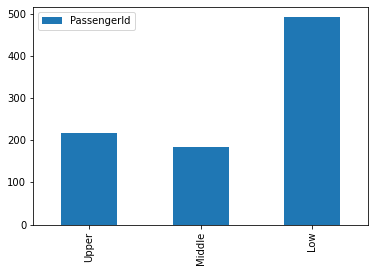

In [116]:
pclass.plot.bar()

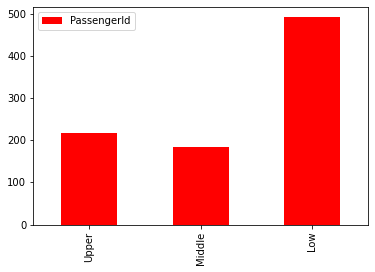

In [119]:
pclass.plot.bar(color=['red'])

In [125]:
sex = df.groupby('Sex').count()[['PassengerId']]
sex

,PassengerId
Sex,
female,314
male,577


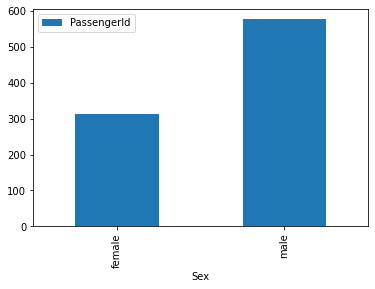

In [126]:
sex.plot.bar()

In [127]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,in_group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,False


In [130]:
df[(df['Sex'] == 'female') & (df['Survived'] == 0)].count()[0]

81

In [131]:
df[(df['Sex'] == 'female') & (df['Survived'] == 1)].count()[0]

233

In [132]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,in_group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,False


In [135]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [138]:
embarked = df.groupby('Embarked').count()[['PassengerId']]
embarked

,PassengerId
Embarked,
C,168
Q,77
S,644


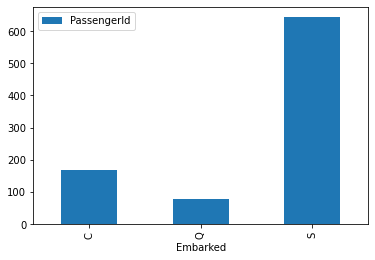

In [139]:
embarked.plot.bar()